## Notebook for diagnostics: data issues, ipm/tt/adu histograms, ROIviewer

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
from scipy.ndimage import rotate

import XSpect.XSpect_Diagnostics as dt

### Setting experiment details

#### XCS example

In [2]:
# run = 339
# exp = 'xcsc00121'

# keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_area'] 
# names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']

#### MFX example (DAQ II)
- **_NOTE:_** In DAQ II a single HDF5 file is actually divide into several files. The main file is just a virtual file. This means the indexing is meaningless. If you want to plot as a function of index you need to use the timestamp.

In [3]:
run = 74
exp = 'mfx100894224'

keys=['tt/fltpos_ps', 'epics/lxt', 'scan/mfx_lxt_fast1', 'MfxDg2BmMon/totalIntensityJoules', 'tt/ampl','epix100/ROI_area'] 
names=['time_tool_correction','lxt_ttc','encoder','ipm', 'time_tool_ampl', 'epix']

d = dt.diagnostics(run, exp, keys, names)

Run 74 imported


#### Inspecting diagnostics object after initialization

In [4]:
dt.utils.object_inspector(d)

----- METHODS -----
('__init__', <bound method diagnostics.__init__ of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('adu_histogram', <bound method diagnostics.adu_histogram of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('hplot', <bound method plotting.hplot of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('ipm_histogram', <bound method diagnostics.ipm_histogram of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('load_run_keys', <bound method diagnostics.load_run_keys of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('read_H5', <bound method diagnostics.read_H5 of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('roiview', <bound method plotting.roiview of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('ttAMPL_histogram', <bound method diagnostics.ttAMPL_histogram of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('xas_

#### All groups and dataset keys

In [5]:
d.allgroupsdatasetskeys

['MfxDg1BmMon',
 'MfxDg1BmMon/peakAmplitude',
 'MfxDg1BmMon/peakTime',
 'MfxDg1BmMon/totalIntensityJoules',
 'MfxDg1BmMon/xPositionMeters',
 'MfxDg1BmMon/yPositionMeters',
 'MfxDg2BmMon',
 'MfxDg2BmMon/peakAmplitude',
 'MfxDg2BmMon/peakTime',
 'MfxDg2BmMon/totalIntensityJoules',
 'MfxDg2BmMon/xPositionMeters',
 'MfxDg2BmMon/yPositionMeters',
 'Sums',
 'Sums/epix100_calib',
 'Sums/epix100_calib_dropped',
 'Sums/epix100_calib_max',
 'Sums/epix100_calib_thresADU1',
 'Sums/jungfrau_calib',
 'Sums/jungfrau_calib_dropped',
 'Sums/jungfrau_calib_max',
 'Sums/jungfrau_calib_thresADU1',
 'UserDataCfg',
 'UserDataCfg/MfxDg1BmMon',
 'UserDataCfg/MfxDg1BmMon/detname',
 'UserDataCfg/MfxDg1BmMon/name',
 'UserDataCfg/MfxDg2BmMon',
 'UserDataCfg/MfxDg2BmMon/detname',
 'UserDataCfg/MfxDg2BmMon/name',
 'UserDataCfg/ebeamh',
 'UserDataCfg/ebeamh/detname',
 'UserDataCfg/ebeamh/name',
 'UserDataCfg/epics',
 'UserDataCfg/epics/PV_0',
 'UserDataCfg/epics/PV_1',
 'UserDataCfg/epics/PV_2',
 'UserDataCfg/epics/

### Loading specified keys
- metadata = True, creates attribute `self.meta_data`, with info for each key/dataset like: data types, array shape, memory usage, nan count, max, min, mean

In [6]:
d.load_run_keys(metadata=True)

meta data set to true, loading meta data
meta data set to true, loading meta data
meta data set to true, loading meta data
meta data set to true, loading meta data
meta data set to true, loading meta data
meta data set to true, loading meta data
Finished loading keys, h5 file open/closed bool state is: False


In [7]:
d.meta_data

[{'header': [['type', 'shape', 'memory size (GB)'],
   ['nan count', 'max', 'min', 'mean']]},
 {'tt/fltpos_ps': [[dtype('<f8'), (24000,), 0.000192],
   [23, 7.2676127516205025, -1.402344546281398, -0.748619582209238]]},
 {'epics/lxt': [[dtype('<f8'), (24000,), 0.000192],
   [0,
    -1.0000000010863949e-12,
    -1.0000000010863949e-12,
    -1.0000000010863949e-12]]},
 {'scan/mfx_lxt_fast1': [[dtype('<f8'), (24000, 1), 0.000192],
   [0,
    5.000012375227934e-12,
    -1.9998034773776564e-12,
    1.5000086493169829e-12]]},
 {'MfxDg2BmMon/totalIntensityJoules': [[dtype('<f8'), (24000,), 0.000192],
   [0, 500451.5, -2384.5, 364969.3106458333]]},
 {'tt/ampl': [[dtype('<f8'), (24000,), 0.000192],
   [23, 0.6815873834961703, 0.0, 0.17739087873422488]]},
 {'epix100/ROI_area': [[dtype('<f8'), (24000, 704, 78), 10.543104],
   [0, 62.607779999999984, -1.373819999999996, 0.1694161023091474]]}]

#### Inspect diagnostics object after loading data

In [8]:
dt.utils.object_inspector(d)

----- METHODS -----
('__init__', <bound method diagnostics.__init__ of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('adu_histogram', <bound method diagnostics.adu_histogram of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('hplot', <bound method plotting.hplot of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('ipm_histogram', <bound method diagnostics.ipm_histogram of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('load_run_keys', <bound method diagnostics.load_run_keys of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('read_H5', <bound method diagnostics.read_H5 of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('roiview', <bound method plotting.roiview of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('ttAMPL_histogram', <bound method diagnostics.ttAMPL_histogram of <XSpect.XSpect_Diagnostics.diagnostics object at 0x7f11984da610>>)
('xas_

### Binding/Reading H5 file
- Initializing the diagnostics object automatically reads and binds the H5 file as `self.h5`.
- This gives you the flexibility to read data like above with `load_run_keys` or directly access the hdf5 file from `self.h5`.
- During heavy i/o sometimes the hdf5 file gets closed. It can be reopened with the `read_H5` method.

In [26]:
# Check open/closed state of HDF5 file
d.h5.__bool__()

True

In [27]:
d.read_H5()

Run 74 imported


In [28]:
# Check open/closed state of HDF5 file
d.h5.__bool__()

True

#### Accessing datasets

In [29]:
d.h5['epix100'].keys()

<KeysViewHDF5 ['ROI_area', 'droplet_nDroplets', 'droplet_nDroplets_all', 'full_com', 'full_max', 'full_mean', 'full_sum', 'var_droplet_sparse', 'var_droplet_sparse_len', 'var_full_sparse', 'var_full_sparse_len']>

In [30]:
d.h5['gasdet'].keys()

<KeysViewHDF5 ['f11ENRC', 'f12ENRC', 'f21ENRC', 'f22ENRC', 'f63ENRC', 'f64ENRC']>

#### Plotting Gas Detector 

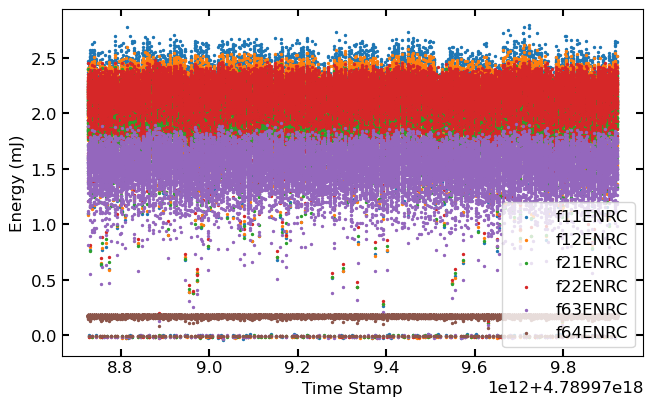

In [44]:
for x in d.h5['gasdet']:
    plt.scatter(d.h5['timing/timestamp'][:], d.h5['gasdet/' + x][:], s = 2, label = str(x))
    plt.xlabel("Time Stamp")
    plt.ylabel("Energy (mJ)")
    plt.legend()

#### Plotting Summed Epix100 Image

Text(0.5, 1.0, 'Sums/epix100_calib')

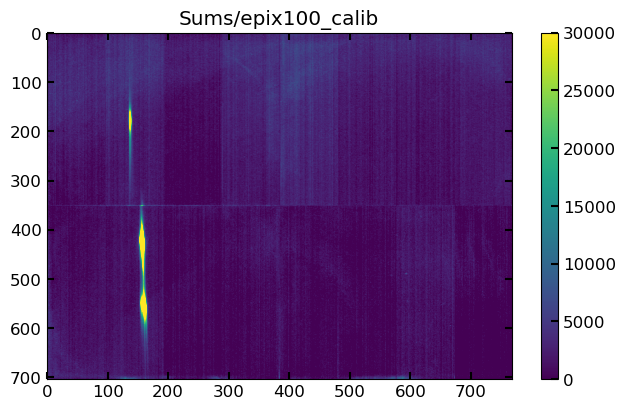

In [56]:
plt.imshow(d.h5['Sums/epix100_calib'], aspect='auto')
plt.colorbar()
plt.clim(0,3e4)
plt.title('Sums/epix100_calib')

In [57]:
projection_x = np.nansum(d.h5['Sums/epix100_calib'], axis = 0)
projection_y = np.nansum(d.h5['Sums/epix100_calib'], axis = 1)

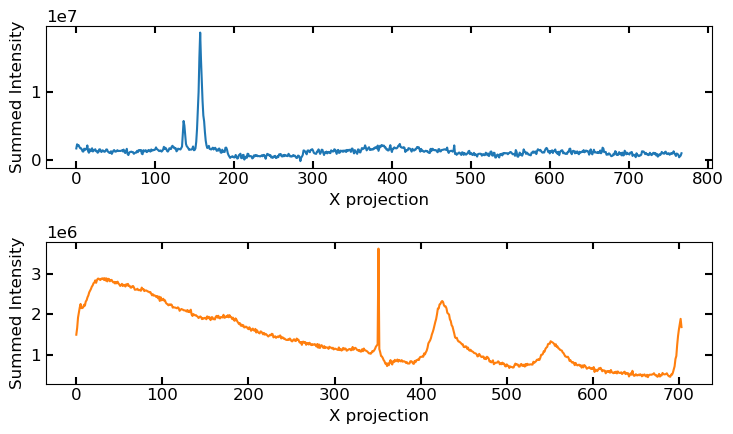

In [67]:
plt.subplot(2, 1, 1)
plt.plot(projection_x)
plt.xlabel("X projection")
plt.ylabel("Summed Intensity")
plt.subplot(2, 1, 2)
plt.plot(projection_y, color = "tab:orange")
plt.xlabel("X projection")
plt.ylabel("Summed Intensity")
plt.tight_layout()

### Built in plotting methods

#### Histograms

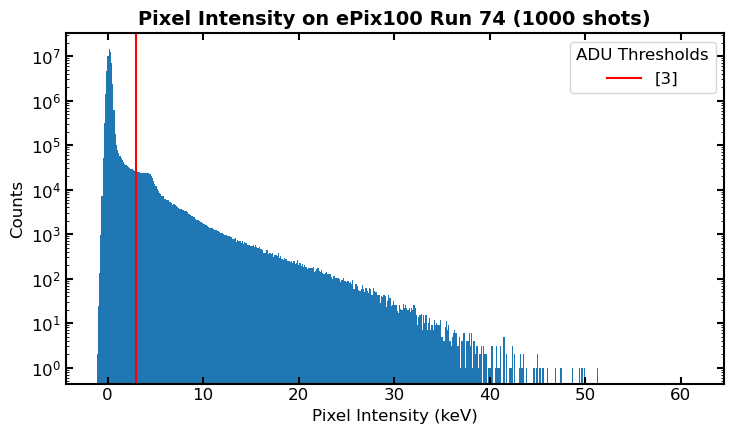

In [68]:
nshots = 1000
thresholds = [3]

d.adu_histogram(nshots, thresholds)

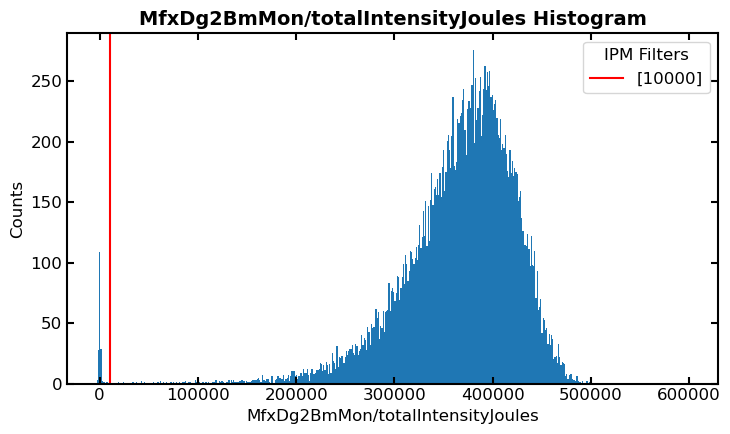

In [69]:
ipm_thres = [10000]

d.ipm_histogram(ipm_thres)

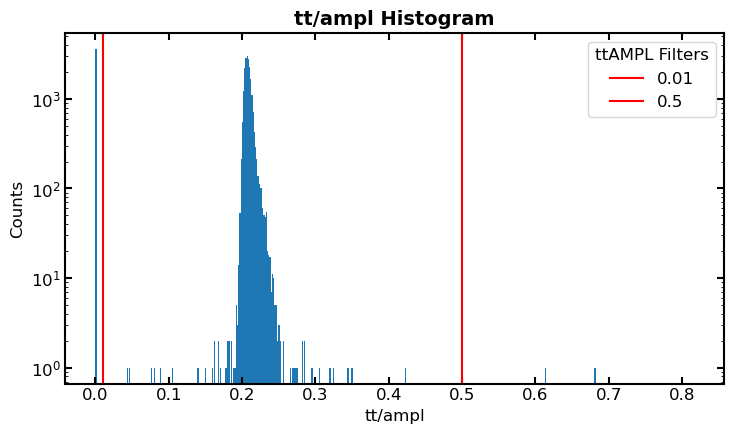

In [71]:
tt_thres = [0.01, 0.5]

d.ttAMPL_histogram(tt_thres)

#### ROI Viewers for XES and XAS

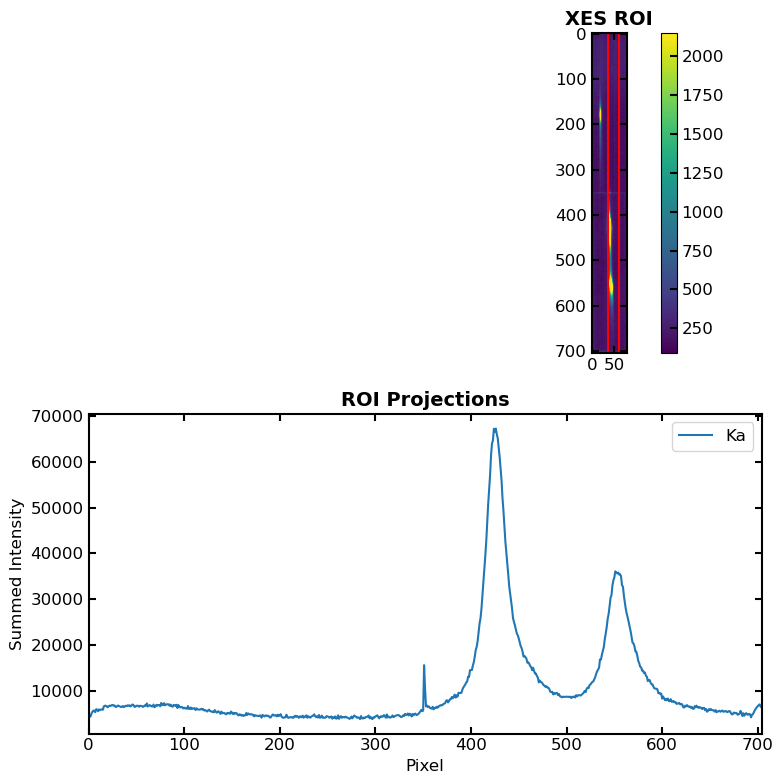

In [78]:
nshots = 1000
ka_roi = [35, 60]

d.xes_ROI(nshots, ka_limits = ka_roi)

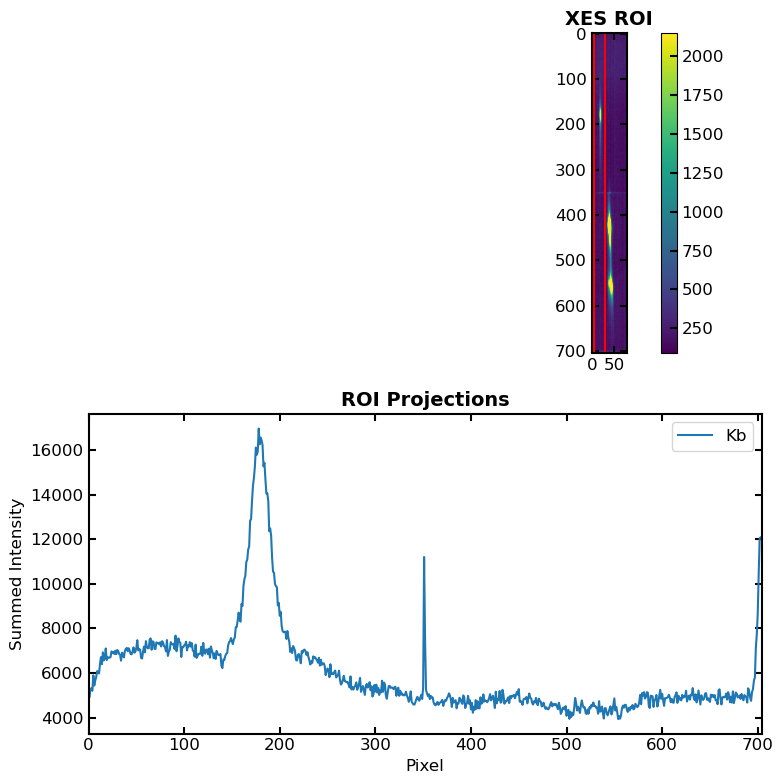

In [79]:
nshots = 1000
kb_roi = [5, 30]

d.xes_ROI(nshots, kb_limits = kb_roi)

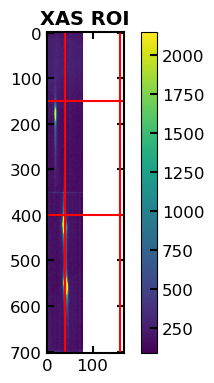

In [81]:
nshots = 1000
h_lims = [40, 160]
v_lims = [150, 400]

d.xas_ROI(nshots, horiz_limits = h_lims, vert_limits = v_lims)

## Old Notebook Content

In [36]:
x_ev=d.h5['scan']['mcc'][:]
fee_spec=d.h5['feespec/hproj'][:]
gas_det_22=d.h5['gasdet/f22ENRC'][:]

In [ ]:
spec_unique=[]
for i in np.unique(x_ev):
    index=np.nonzero(x_ev==i)[0]
    temp=np.nansum(fee_spec[index],0)
    spec_unique.append(temp)
    plt.plot(temp,label='%.1f eV'%i)
spec_unique=np.array(spec_unique)
plt.legend()

plt.figure()
plt.plot(np.nansum(fee_spec,0))

In [ ]:
spec_unique_n=[]
for i in np.unique(x_ev):
    index=np.nonzero(x_ev==i)[0]
    temp=np.nansum(fee_spec[index],0)
    i0_temp=np.nansum(gas_det_22[index],0)
    spec_unique_n.append(temp/i0_temp)
    plt.plot(temp/i0_temp,label='%.1f eV'%i)
spec_unique_n=np.array(spec_unique_n)
plt.legend()

plt.figure()
plt.plot(np.nansum(fee_spec,0)/np.nansum(gas_det_22,0))

In [ ]:
spec_unique_n=[]
for i in np.unique(x_ev):
    index=np.nonzero(x_ev==i)[0]
    temp=np.nansum(fee_spec[index],0)
    i0_temp=np.nansum(gas_det_22[index],0)
    spec_unique_n.append(temp/i0_temp)
    plt.plot(temp/i0_temp,label='%.1f eV'%i)
spec_unique_n=np.array(spec_unique_n)
plt.legend()

plt.figure()
plt.plot(np.nansum(fee_spec,0)/np.nansum(gas_det_22,0))

In [ ]:
d.h5['feeBld']['hproj'][:].shape

In [ ]:
d.h5['feeBld'].keys()
#d.h5['UserDataCfg']['epix_2']['ROI_0__ROI_0_ROI'][:]

In [ ]:
plt.imshow(fee_spec,aspect='auto')

In [ ]:
meanfee = np.nanmean(fee_spec,axis=0)
plt.plot(meanfee)

In [ ]:
d.h5['epix_2'].keys()

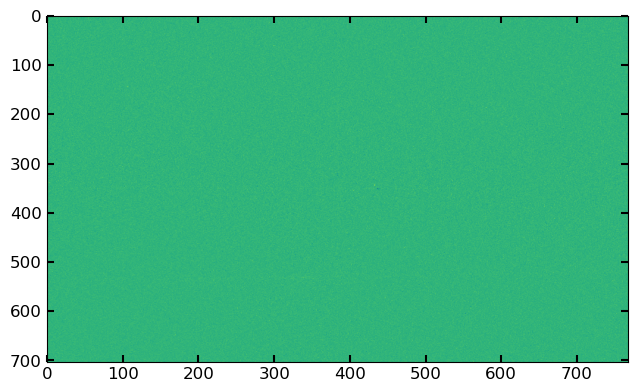

In [7]:
plt.imshow(d.h5['Sums']['epix_1_calib'][:],aspect='auto') #run 13

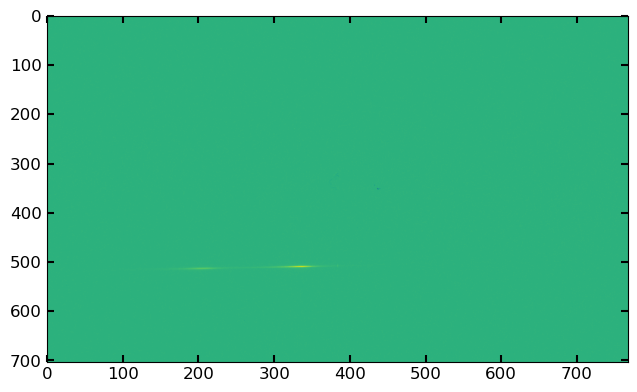

In [14]:
plt.imshow(d.h5['Sums']['epix_1_calib'][:],aspect='auto')

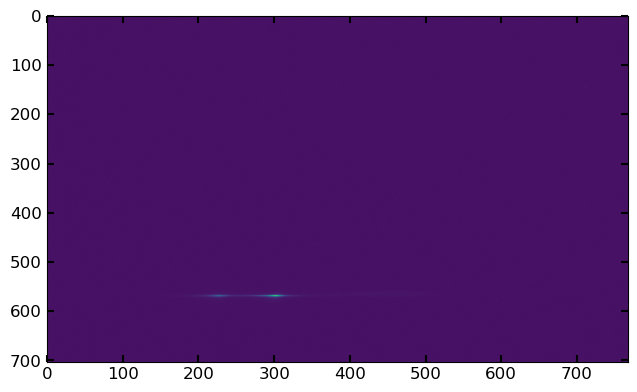

In [9]:
plt.imshow(d.h5['Sums']['epix_2_calib'][:],aspect='auto') #run 13

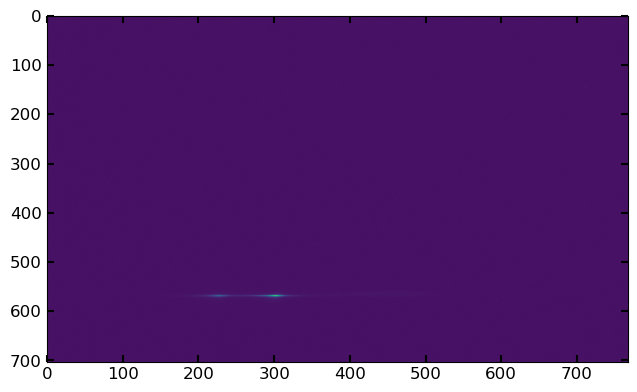

In [10]:
#epix_2d = np.nanmean(d.h5['epix_1']['ROI_0_area'][:],axis=0)
plt.imshow(d.h5['Sums']['epix_2_calib'][:],aspect='auto')

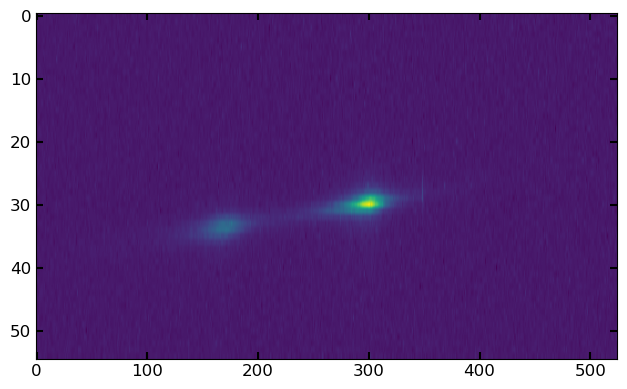

In [15]:
epix_2d = np.nanmean(d.h5['epix_1']['ROI_0_area'][:],axis=0) # run 13
plt.imshow(epix_2d,aspect='auto')

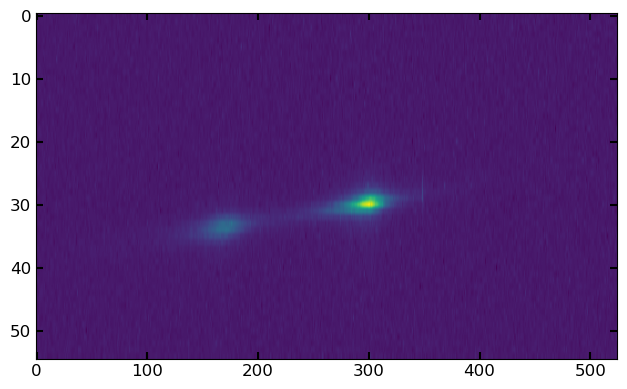

In [6]:
epix_2d = np.nanmean(d.h5['epix_1']['ROI_0_area'][:],axis=0)
plt.imshow(epix_2d,aspect='auto')

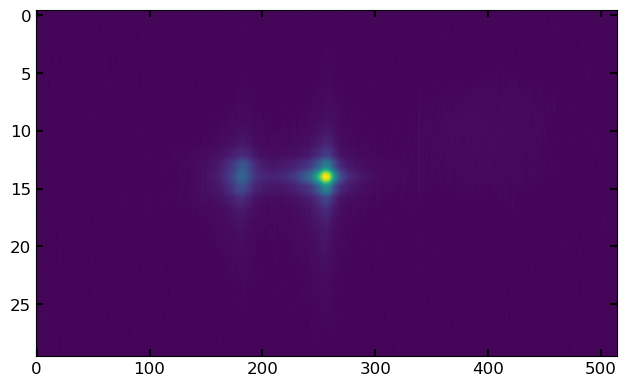

In [5]:
epix_2d = np.nanmean(d.h5['epix_2']['ROI_0_area'][:],axis=0)
plt.imshow(epix_2d,aspect='auto')

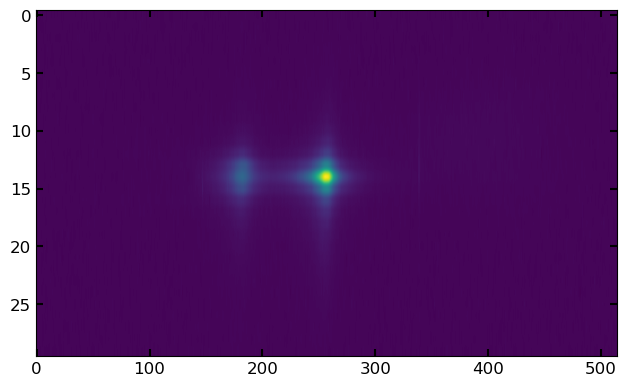

In [12]:
epix_2d = np.nanmean(d.h5['epix_2']['ROI_0_area'][:],axis=0) # run 13
plt.imshow(epix_2d,aspect='auto')

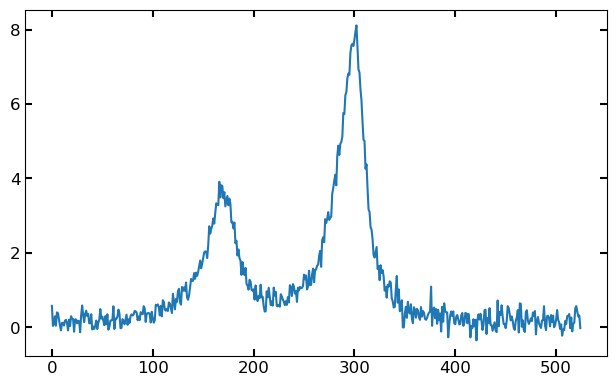

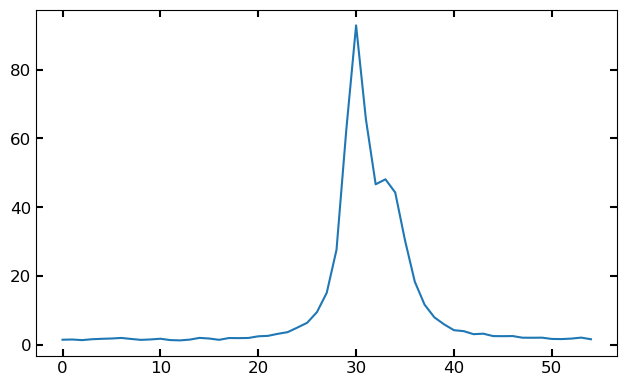

In [17]:
plt.plot(np.nanmean(d.h5['epix_1']['ROI_0_spectrum_projection_data'][:],axis=0))
plt.figure()
plt.plot(np.nanmean(d.h5['epix_1']['ROI_0_spatial_projection_data'][:],axis=0))

In [ ]:
plt.plot(np.nanmean(d.h5['epix_1']['ROI_0_spectrum_projection_data'][:],axis=0))
plt.figure()
plt.plot(np.nanmean(d.h5['epix_1']['ROI_0_spatial_projection_data'][:],axis=0))